In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [6]:
# Đọc dữ liệu
data = pd.read_csv('data/data_clean.csv')
print("Shape của dữ liệu:", data.shape)
data.head()

Shape của dữ liệu: (1000, 7)


,age,gender,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,Female,90,3,24,Groceries,113.53
1,21,Female,60,2,42,Sports,41.93
2,60,Female,30,2,28,Clothing,424.36
3,40,Other,74,9,5,Home & Garden,991.93
4,65,Female,21,3,25,Electronics,347.08


In [7]:
# Chuẩn hóa dữ liệu phân loại
le = LabelEncoder()
data['gender_encoded'] = le.fit_transform(data['gender'])
data['category_encoded'] = le.fit_transform(data['preferred_category'])

# Chọn features cho Random Forest
features = ['age', 'spending_score', 'membership_years', 
           'purchase_frequency', 'last_purchase_amount',
           'gender_encoded', 'category_encoded']

X = data[features]

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thực hiện K-means
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

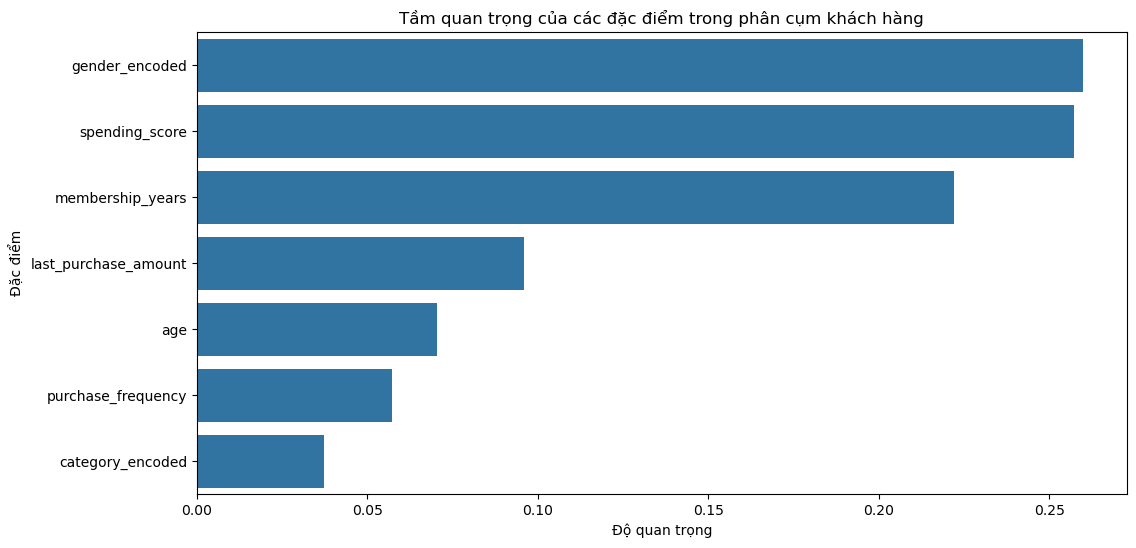

In [10]:
# Tạo và huấn luyện Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, data['Cluster'])

# Lấy feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Vẽ biểu đồ feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Tầm quan trọng của các đặc điểm trong phân cụm khách hàng')
plt.xlabel('Độ quan trọng')
plt.ylabel('Đặc điểm')
plt.show()

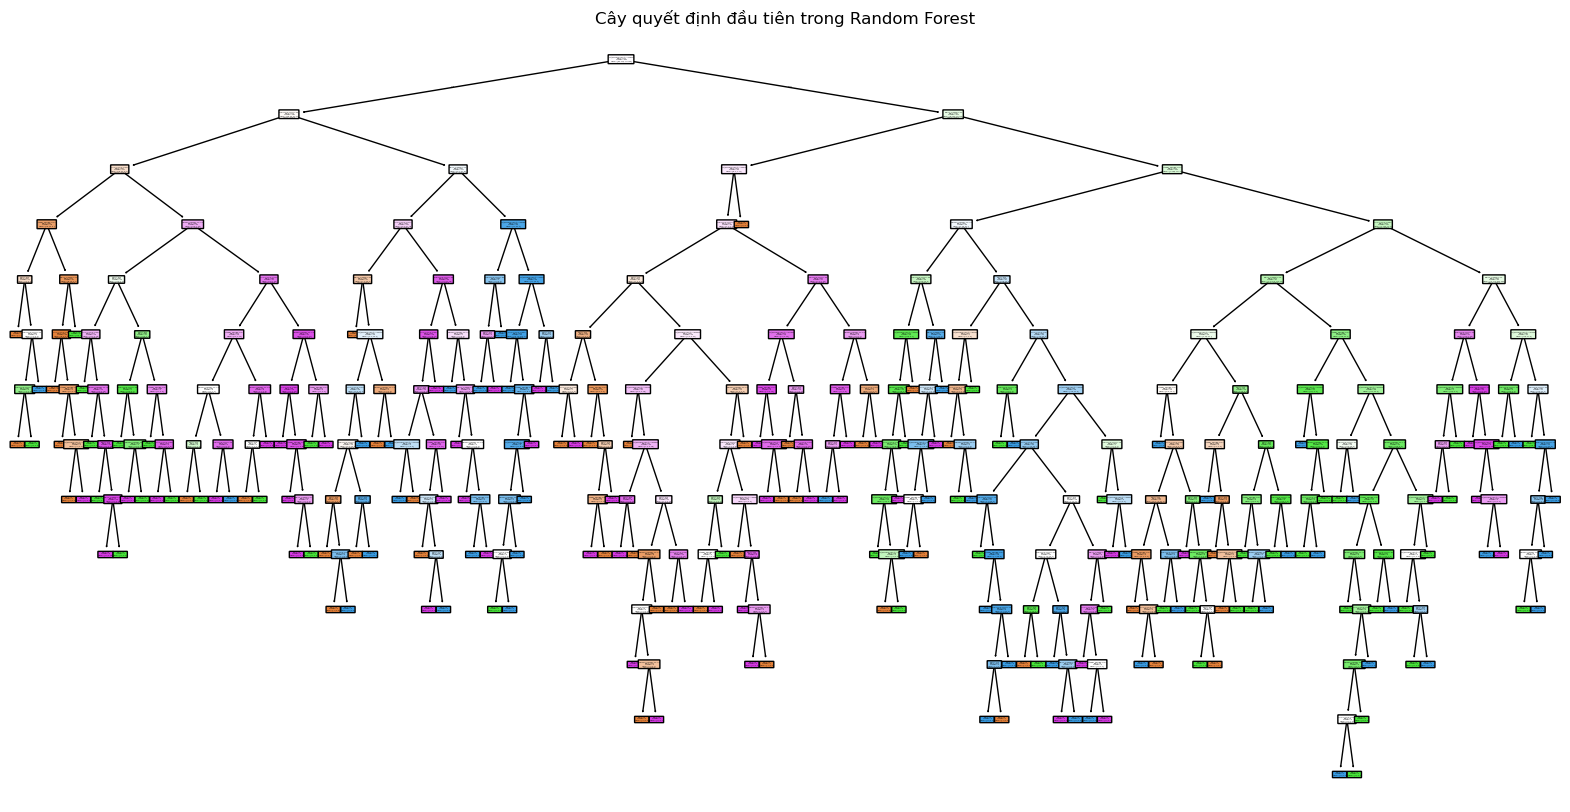

In [11]:
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], 
          feature_names=features,
          class_names=[f'Cluster {i}' for i in range(5)],
          filled=True,
          rounded=True)
plt.title('Cây quyết định đầu tiên trong Random Forest')
plt.show()

In [13]:
# Tạo DataFrame cho từng cluster
cluster_analysis = pd.DataFrame()

for cluster in range(5):
    # Lấy dữ liệu cho cluster hiện tại
    cluster_data = data[data['Cluster'] == cluster]
    
    # Tính các thống kê
    stats = {
        'Số lượng khách hàng': len(cluster_data),
        'Tuổi trung bình': cluster_data['age'].mean(),
        'Điểm chi tiêu trung bình': cluster_data['spending_score'].mean(),
        'Năm thành viên trung bình': cluster_data['membership_years'].mean(),
        'Tần suất mua hàng trung bình': cluster_data['purchase_frequency'].mean(),
        'Số tiền mua hàng trung bình': cluster_data['last_purchase_amount'].mean(),
        'Giới tính phổ biến': cluster_data['gender'].mode().iloc[0] if not cluster_data['gender'].mode().empty else 'N/A',
        'Danh mục ưa thích phổ biến': cluster_data['preferred_category'].mode().iloc[0] if not cluster_data['preferred_category'].mode().empty else 'N/A'
    }
    
    cluster_analysis[f'Cluster {cluster}'] = pd.Series(stats)

print("\nPhân tích chi tiết các cluster:")
print(cluster_analysis.T)


Phân tích chi tiết các cluster:
          Số lượng khách hàng Tuổi trung bình Điểm chi tiêu trung bình  \
Cluster 0                 253       39.509881                25.940711   
Cluster 1                 248       47.233871                52.717742   
Cluster 2                 236       43.927966                44.402542   
Cluster 3                 263       44.509506                78.209125   
Cluster 4                   0             NaN                      NaN   

          Năm thành viên trung bình Tần suất mua hàng trung bình  \
Cluster 0                  4.608696                    26.130435   
Cluster 1                  3.084677                    25.157258   
Cluster 2                  8.398305                    28.169492   
Cluster 3                   5.91635                    26.988593   
Cluster 4                       NaN                          NaN   

          Số tiền mua hàng trung bình Giới tính phổ biến  \
Cluster 0                  406.899802             Fem

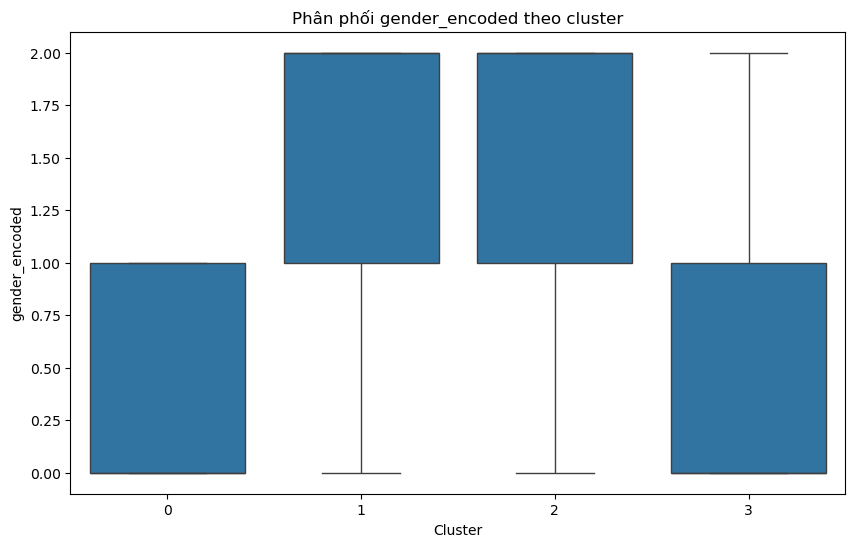

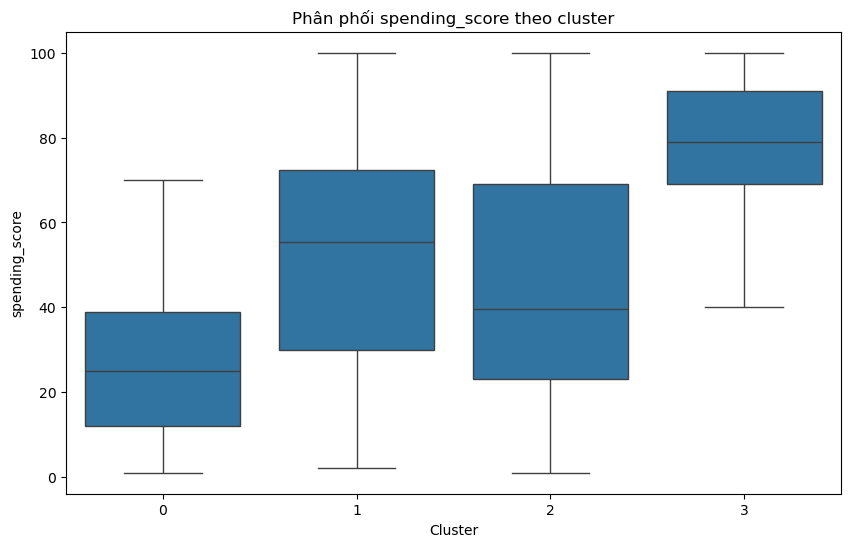

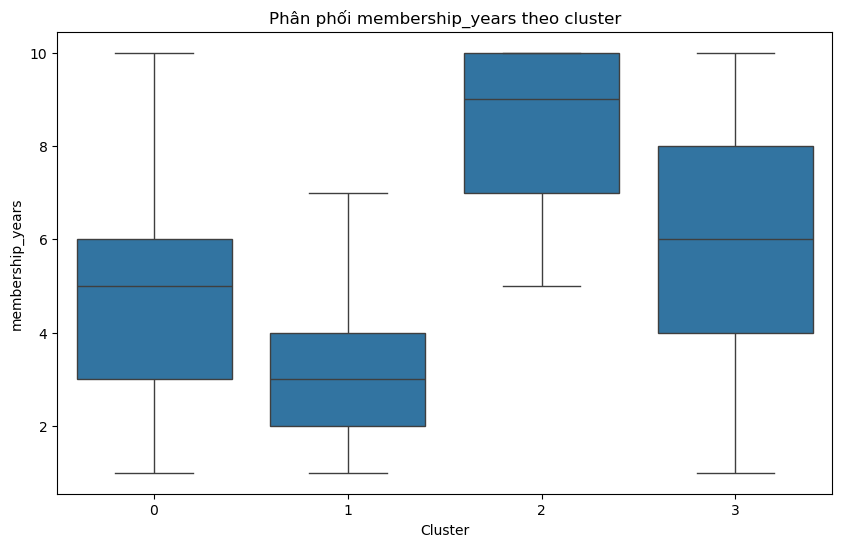

In [14]:
# Vẽ biểu đồ cho các đặc điểm quan trọng nhất
important_features = feature_importance['feature'].head(3).tolist()

for feature in important_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Phân phối {feature} theo cluster')
    plt.show()